In [76]:
import random
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing as mp

In [77]:
######################################################
########         Define Classes      #################
######################################################
class Car:
    def __init__(self, position, velocity, max_velocity):
        self.position = position
        self.velocity = velocity
        self.max_velocity = max_velocity
        self.laps = 0  # New counter to track laps

    def accelerate(self):
        if self.velocity < self.max_velocity:
            self.velocity += 1

    def decelerate(self):
        if self.velocity > 0:
            self.velocity -= 1

    def move(self, road_length):
        new_position = self.position + self.velocity 
        # Check if the car has completed a lap
        if new_position >= road_length:
            self.laps +=1
        # Update car position, loop around. 
        self.position = new_position % road_length

class TrafficSimulation:
    def __init__(self, road_length, density, max_velocity, slow_down_prob):
        self.road_length = road_length
        self.density = density
        self.max_velocity = max_velocity
        self.slow_down_prob = slow_down_prob
        self.road = [-1] * road_length  # -1 represents an empty cell
        self.cars = []

        self.initialize_road()

    def initialize_road(self):
        num_cars = int(self.density * self.road_length)
        car_positions = random.sample(range(self.road_length), num_cars)

        for position in car_positions:
            velocity = random.randint(0, self.max_velocity)
            self.cars.append(Car(position, velocity, self.max_velocity))
            self.road[position] = velocity

    def update(self):
        for car in self.cars:
            if random.random() < self.slow_down_prob:
                car.decelerate()
            else:
                car.accelerate()

            # Check for collisions
            distance_to_next_car = self.distance_to_next_car(car.position)
            if car.velocity > distance_to_next_car:
                car.velocity = distance_to_next_car


        # Reset road and update with new car positions
        self.road = [-1] * self.road_length
        for car in self.cars:
            car.move(self.road_length)
            self.road[car.position] = car.velocity

    def distance_to_next_car(self, position):
        next_car_position = (position + 1) % self.road_length
        distance = 0

        while self.road[next_car_position] == -1:
            distance += 1
            next_car_position = (next_car_position + 1) % self.road_length

        return distance

    def display(self):
        for cell in self.road:
            if cell == -1:
                print('-', end=' ')
            else:
                print(cell, end=' ')
        print()

    def get_lap_counts(self):
        return [car.laps for car in self.cars]



In [75]:
# Example Usage
road_length = 60
density = 0.5
max_velocity = 5
slow_down_prob = 0

simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)

for _ in range(100):
    simulation.display()
    simulation.update()

lap_counts = simulation.get_lap_counts()
print(f"Lap Counts mean: {sum(lap_counts)}")

0 5 3 4 - - 4 5 5 5 5 0 - - 4 3 - - 1 1 - - 4 - - - 1 5 5 2 - - 0 - - 2 - 4 - - - - - 3 - 2 - - - 3 0 - - 2 0 - 5 - 5 - 
0 0 0 - - 2 0 0 0 0 0 - 1 - 0 - - 2 0 - - 2 - - - 3 0 0 0 - - 2 - 1 - - 1 - - - - - 5 - 1 - - - 3 0 - 1 - 0 - 1 - 1 - 1 
0 0 - 1 - 0 0 0 0 0 - 1 - 1 - 1 - 0 - 1 - - - - 3 0 0 0 - 1 - - 1 - - 2 - - 2 - - - - 1 - - 2 - 0 - 1 - 1 0 - - 1 - 1 0 
0 - 1 - 1 0 0 0 0 0 - - 1 - 1 - 1 0 - 0 - - - - 0 0 0 - 1 - - 2 - - 2 - - 2 - - - 3 - 0 - - - 1 - 1 - 1 0 - 1 - - 1 0 0 
- 1 0 - 0 0 0 0 0 0 - - - 1 - 1 0 - 1 - 1 - - - 0 0 0 - - - 2 - - 2 - 1 - - - - 3 - 1 - 1 - - 0 - - 1 0 - 1 - - 2 0 0 0 
1 0 - 1 0 0 0 0 0 0 - - - 0 - 0 0 - - 1 - - 2 - 0 0 - 1 - - - - 2 - 1 - - 2 - - - 1 - 1 - - 2 - 1 - 0 - 1 - - 2 0 0 0 - 
0 - 1 0 0 0 0 0 0 - 1 - - - 1 0 - 1 - - - 2 - 1 0 0 - - - 2 - - - 1 - - 2 - - - 3 - 1 - - 2 - 1 - 1 0 - - - 2 0 0 0 - 1 
0 - 0 0 0 0 0 0 - 1 - - 2 - 0 - 1 - - 2 - - 1 0 0 - 1 - - - - - 3 0 - - - - - 3 - 1 0 - - - 1 - 1 0 - 1 - - 0 0 0 - 1 0 
- 1 0 0 0 0 0 - 1 0 - - - 1 0 - 

In [110]:
###########################
#### Test one #############
###########################

def sim_range_density_noSlow(density):
    road_length = 100
    max_velocity = 5
    slow_down_prob = 0
    number_of_steps = 10000
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)

num_processes = 4
pool = mp.Pool(processes=num_processes)

num = 100
list_density = np.linspace(0,1,num)

results = pool.map(sim_range_density_noSlow, list_density) 
pool.close(); pool.join()


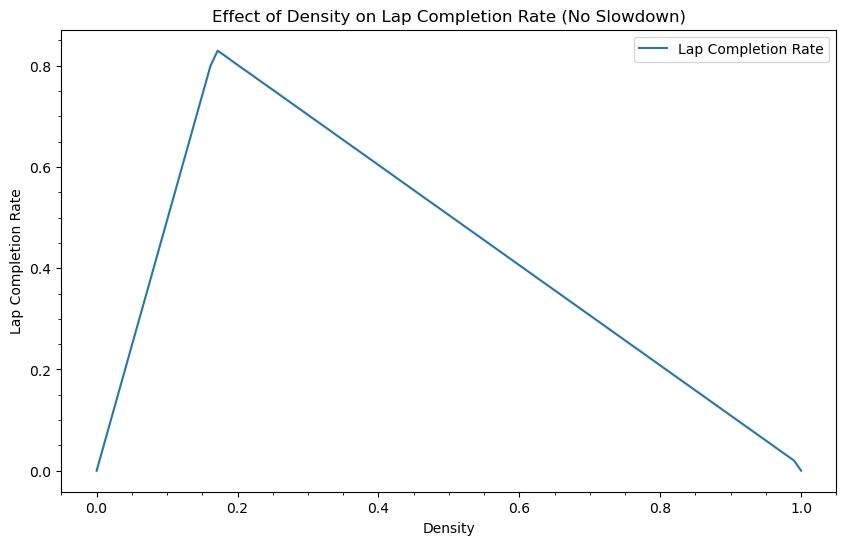

In [111]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(list_density, results, label='Lap Completion Rate')
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.xlabel('Density')
plt.ylabel('Lap Completion Rate')
plt.title('Effect of Density on Lap Completion Rate (No Slowdown)')
plt.legend()
plt.show()

In [112]:
def sim_range_density_noSlow(density):
    road_length = 100
    max_velocity = 5
    slow_down_prob = 0
    number_of_steps = 1000
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)
def sim_range_density_Slow1(density):
    road_length = 100
    max_velocity = 5
    slow_down_prob = 0.1
    number_of_steps = 1000
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)
def sim_range_density_Slow2(density):
    road_length = 100
    max_velocity = 5
    slow_down_prob = 0.2
    number_of_steps = 1000
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)
def sim_range_density_Slow3(density):
    road_length = 100
    max_velocity = 5
    slow_down_prob = 0.3
    number_of_steps = 1000
    simulation = TrafficSimulation(road_length, density, max_velocity, slow_down_prob)
    for _ in range(number_of_steps):
        simulation.update()
    return np.sum(np.array(simulation.get_lap_counts())/number_of_steps)




num_processes = 4
pool = mp.Pool(processes=num_processes)
num = 100
list_density = np.linspace(0,1,num)

results_noslow = pool.map(sim_range_density_noSlow, list_density) 
results_slow1 = pool.map(sim_range_density_Slow1, list_density) 
results_slow2 = pool.map(sim_range_density_Slow2, list_density) 
results_slow3 = pool.map(sim_range_density_Slow3, list_density) 
pool.close(); pool.join()


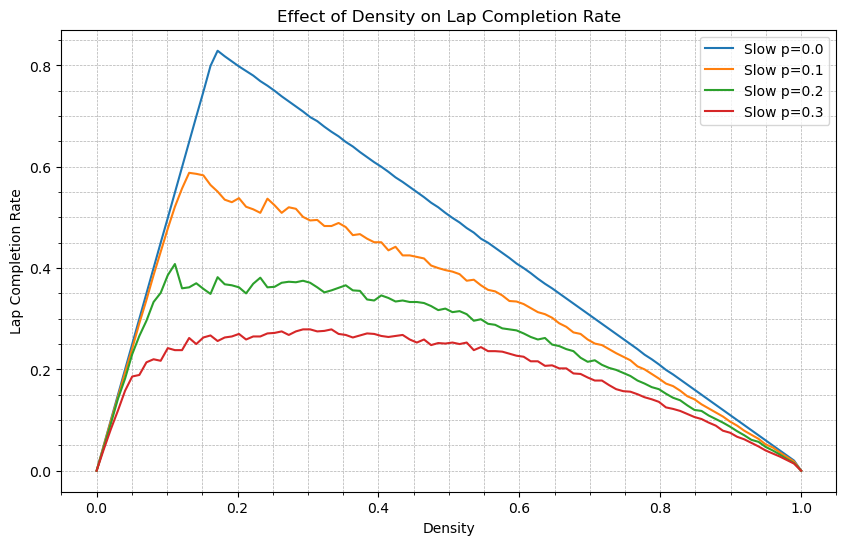

In [115]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(list_density, results_noslow, label='Slow p=0.0')
plt.plot(list_density, results_slow1, label='Slow p=0.1')
plt.plot(list_density, results_slow2, label='Slow p=0.2')
plt.plot(list_density, results_slow3, label='Slow p=0.3')

plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.minorticks_on()
plt.xlabel('Density')
plt.ylabel('Lap Completion Rate')
plt.title('Effect of Density on Lap Completion Rate')
plt.legend()
plt.show()